In [2]:
# neccessary imports
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib  inline

In [3]:
!..\env\Scripts\activate.bat

In [37]:
# reading the data
path = os.path.join('..','Data', 'insuranceFraud.csv')
data=pd.read_csv(path)

In [38]:
# Having a look at the data
data.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,10/17/2014,OH,250/500,1000,1406.91,0,466132,...,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,342868,6/27/2006,IN,250/500,2000,1197.22,5000000,468176,...,0,?,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,687698,9/6/2000,OH,100/300,2000,1413.14,5000000,430632,...,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,227811,5/25/1990,IL,250/500,2000,1415.74,6000000,608117,...,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,367455,6/6/2014,IL,500/1000,1000,1583.91,6000000,610706,...,1,NO,6500,1300,650,4550,Accura,RSX,2009,N


# Checking type of values

In [39]:
# checking for th number of categorical and numerical columns
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 39 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

# Dropping Cols

#### Dropping cols which are unnecessary to avoid extra computation over it.

In [40]:
# list of columns not necessary for prediction
cols_to_drop=['policy_number','policy_bind_date','policy_state','insured_zip','incident_location','incident_date','incident_state','incident_city','insured_hobbies','auto_make','auto_model','auto_year']

In [41]:
data.drop(columns=cols_to_drop,inplace=True)

In [42]:
data.head()

,months_as_customer,age,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_relationship,...,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,fraud_reported
0,328,48,250/500,1000,1406.91,0,MALE,MD,craft-repair,husband,...,1,YES,1,2,YES,71610,6510,13020,52080,Y
1,228,42,250/500,2000,1197.22,5000000,MALE,MD,machine-op-inspct,other-relative,...,1,?,0,0,?,5070,780,780,3510,Y
2,134,29,100/300,2000,1413.14,5000000,FEMALE,PhD,sales,own-child,...,3,NO,2,3,NO,34650,7700,3850,23100,N
3,256,41,250/500,2000,1415.74,6000000,FEMALE,PhD,armed-forces,unmarried,...,1,?,1,2,NO,63400,6340,6340,50720,Y
4,228,44,500/1000,1000,1583.91,6000000,MALE,Associate,sales,unmarried,...,1,NO,0,1,NO,6500,1300,650,4550,N


# Null Value Check

In [43]:
data.isna().sum()

months_as_customer             0
age                            0
policy_csl                     0
policy_deductable              0
policy_annual_premium          0
umbrella_limit                 0
insured_sex                    0
insured_education_level        0
insured_occupation             0
insured_relationship           0
capital-gains                  0
capital-loss                   0
incident_type                  0
collision_type                 0
incident_severity              0
authorities_contacted          0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
property_damage                0
bodily_injuries                0
witnesses                      0
police_report_available        0
total_claim_amount             0
injury_claim                   0
property_claim                 0
vehicle_claim                  0
fraud_reported                 0
dtype: int64

In [44]:
cols = data.columns

In [45]:
# CHECKING UNIQUE VALUES IN EACH COLUMN
for col in cols:
    print(col)
    print(data[col].unique())

months_as_customer
[328 228 134 256 137 165  27 212 235 447  60 121 180 473  70 140 160 196
 460 217 370 413 237   8 257 202 224 241  64 166 155 114 149 147  62 289
 431 199  79 116  37 106 269 265 163 355 175 192 430  91 223 195  22 439
  94  11 151 154 245 119 215 295 254 107 478 128 338 271 222 120 270 319
 194 227 244  78 200 284 275 153  31  41 127  61 207 219  80 325  29 239
 279 350 464 118 298  87 261 453 210 168 390 258 225 164 255 206 203 211
 274  81 280 112  24  93 171 124 287 122 398 214 209  82 193 288 104 101
 375 461 428  45 136 216 278 108  14 276  47  73 294 324  53 426 111  86
 296 125 177 238 449 252 359  19 285  30 342 468 343 404  63 335 142 272
  69  38 281 246 330 362 371 377 172  99 249 190 174  95   2 117 242 440
  20 208 156 232  84 394  35 369 332 243 264  32 259 186 201 436 189 105
  88  40  59  39 123 231 247  48 267 286 253  10 158   1  85 233 266  97
 399 305 129 283  96 176 159 290 299  66 334 429  15 230 250  65 475  77
 229 110 292 451 150 291 162 309

['MD' 'PhD' 'Associate' 'Masters' 'High School' 'College' 'JD']
insured_occupation
['craft-repair' 'machine-op-inspct' 'sales' 'armed-forces' 'tech-support'
 'prof-specialty' 'other-service' 'priv-house-serv' 'exec-managerial'
 'protective-serv' 'transport-moving' 'handlers-cleaners' 'adm-clerical'
 'farming-fishing']
insured_relationship
['husband' 'other-relative' 'own-child' 'unmarried' 'wife' 'not-in-family']
capital-gains
[ 53300      0  35100  48900  66000  38400  52800  41300  55700  63600
  53500  45500  57000  46700  72700  31000  53200  27500  81100  51400
  65700  48500  49700  36400  35300  88400  47600  71500  36100  56600
  94800  36900  69100  62400  35700  43400  59600  43300  56200  37800
  78300  52700  57300    800  55200  90700  67700  61500  37300  50500
  34300  28800  52600  34400  62000  41200  44300  58000  51100  47200
  70500  40700  42400  57900  60000  65300  84900  45300  68900  46300
  76000  58600  54100  58100  13100  31900  17600  52000  29000  62500
 

In [46]:
# incident_type, property_damage, police_report_available has ? where data is not available

# In this dataset missing values have been denoted by '?'
# we are replacing ? with NaN for them to be imputed down the line.
data=data.replace('?',np.nan)

In [47]:
df_miss = data.isna().sum()
df_miss[df_miss > 0]

collision_type             178
property_damage            360
police_report_available    343
dtype: int64

In [48]:
data.nunique()

months_as_customer             391
age                             46
policy_csl                       3
policy_deductable                3
policy_annual_premium          991
umbrella_limit                  11
insured_sex                      2
insured_education_level          7
insured_occupation              14
insured_relationship             6
capital-gains                  338
capital-loss                   354
incident_type                    4
collision_type                   3
incident_severity                4
authorities_contacted            5
incident_hour_of_the_day        24
number_of_vehicles_involved      4
property_damage                  2
bodily_injuries                  3
witnesses                        4
police_report_available          2
total_claim_amount             763
injury_claim                   638
property_claim                 626
vehicle_claim                  726
fraud_reported                   2
dtype: int64

In [49]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 27 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_csl                   1000 non-null   object 
 3   policy_deductable            1000 non-null   int64  
 4   policy_annual_premium        1000 non-null   float64
 5   umbrella_limit               1000 non-null   int64  
 6   insured_sex                  1000 non-null   object 
 7   insured_education_level      1000 non-null   object 
 8   insured_occupation           1000 non-null   object 
 9   insured_relationship         1000 non-null   object 
 10  capital-gains                1000 non-null   int64  
 11  capital-loss                 1000 non-null   int64  
 12  incident_type                1000 non-null   object 
 13  collision_type     

In [50]:
#checking duplicated values
data.duplicated().sum()

0

### Extracting the categorical columns

In [51]:
cat_df = data.select_dtypes(include=['object']).copy()

In [52]:
cat_columns = cat_df.columns
cat_columns

Index(['policy_csl', 'insured_sex', 'insured_education_level',
       'insured_occupation', 'insured_relationship', 'incident_type',
       'collision_type', 'incident_severity', 'authorities_contacted',
       'property_damage', 'police_report_available', 'fraud_reported'],
      dtype='object')

In [53]:
len(cat_columns)

12

In [54]:
cat_df.head()

,policy_csl,insured_sex,insured_education_level,insured_occupation,insured_relationship,incident_type,collision_type,incident_severity,authorities_contacted,property_damage,police_report_available,fraud_reported
0,250/500,MALE,MD,craft-repair,husband,Single Vehicle Collision,Side Collision,Major Damage,Police,YES,YES,Y
1,250/500,MALE,MD,machine-op-inspct,other-relative,Vehicle Theft,NaN,Minor Damage,Police,NaN,NaN,Y
2,100/300,FEMALE,PhD,sales,own-child,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NO,NO,N
3,250/500,FEMALE,PhD,armed-forces,unmarried,Single Vehicle Collision,Front Collision,Major Damage,Police,NaN,NO,Y
4,500/1000,MALE,Associate,sales,unmarried,Vehicle Theft,NaN,Minor Damage,None,NO,NO,N


##### Checking the categorical values present in the columns to decide for getDummies encode or custom mapping to convert categorical data to numeric one

In [55]:
custom_mapping_cols = ['policy_csl', 'insured_education_level', 'incident_severity','insured_sex' , 'property_damage' , 'police_report_available', 'fraud_reported']

In [56]:
len(custom_mapping_cols)

7

In [57]:
# custom mapping for encoding
cat_df['policy_csl'] = cat_df['policy_csl'].map({'100/300' : 1, '250/500' : 2.5 ,'500/1000':5})
cat_df['insured_education_level'] = cat_df['insured_education_level'].map({'JD' : 1, 'High School' : 2,'College':3,'Masters':4,'Associate':5,'MD':6,'PhD':7})
cat_df['incident_severity'] = cat_df['incident_severity'].map({'Trivial Damage' : 1, 'Minor Damage' : 2,'Major Damage':3,'Total Loss':4})
cat_df['insured_sex'] = cat_df['insured_sex'].map({'FEMALE' : 0, 'MALE' : 1})
cat_df['property_damage'] = cat_df['property_damage'].map({'NO' : 0, 'YES' : 1})
cat_df['police_report_available'] = cat_df['police_report_available'].map({'NO' : 0, 'YES' : 1})
cat_df['fraud_reported'] = cat_df['fraud_reported'].map({'N' : 0, 'Y' : 1})

In [58]:
cat_df['insured_occupation']

0           craft-repair
1      machine-op-inspct
2                  sales
3           armed-forces
4                  sales
             ...        
995         craft-repair
996       prof-specialty
997         armed-forces
998    handlers-cleaners
999                sales
Name: insured_occupation, Length: 1000, dtype: object

In [59]:
#GET DUMMIES FOR REST
for col in cat_df.drop(columns=custom_mapping_cols).columns:
    print(col)
    cat_df= pd.get_dummies(cat_df, columns=[col], prefix = [col], drop_first=True)

insured_occupation
insured_relationship
incident_type
collision_type
authorities_contacted


In [60]:
# data fter encoding
cat_df.head()

,policy_csl,insured_sex,insured_education_level,incident_severity,property_damage,police_report_available,fraud_reported,insured_occupation_armed-forces,insured_occupation_craft-repair,insured_occupation_exec-managerial,...,insured_relationship_wife,incident_type_Parked Car,incident_type_Single Vehicle Collision,incident_type_Vehicle Theft,collision_type_Rear Collision,collision_type_Side Collision,authorities_contacted_Fire,authorities_contacted_None,authorities_contacted_Other,authorities_contacted_Police
0,2.5,1,6,3,1.0,1.0,1,0,1,0,...,0,0,1,0,0,1,0,0,0,1
1,2.5,1,6,2,NaN,NaN,1,0,0,0,...,0,0,0,1,0,0,0,0,0,1
2,1.0,0,7,2,0.0,0.0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
3,2.5,0,7,3,NaN,0.0,1,1,0,0,...,0,0,1,0,0,0,0,0,0,1
4,5.0,1,5,2,0.0,0.0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0


### extracting the numerical columns


In [61]:
num_df = data.select_dtypes(include=['int64']).copy()

In [62]:
num_df.columns

Index(['months_as_customer', 'age', 'policy_deductable', 'umbrella_limit',
       'capital-gains', 'capital-loss', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'bodily_injuries', 'witnesses',
       'total_claim_amount', 'injury_claim', 'property_claim',
       'vehicle_claim'],
      dtype='object')

In [63]:
# combining the Numerical and categorical dataframes to get the final dataset
final_df=pd.concat([num_df,cat_df], axis=1)

In [64]:
final_df.shape

(1000, 48)

In [65]:
final_df.head()

,months_as_customer,age,policy_deductable,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,...,insured_relationship_wife,incident_type_Parked Car,incident_type_Single Vehicle Collision,incident_type_Vehicle Theft,collision_type_Rear Collision,collision_type_Side Collision,authorities_contacted_Fire,authorities_contacted_None,authorities_contacted_Other,authorities_contacted_Police
0,328,48,1000,0,53300,0,5,1,1,2,...,0,0,1,0,0,1,0,0,0,1
1,228,42,2000,5000000,0,0,8,1,0,0,...,0,0,0,1,0,0,0,0,0,1
2,134,29,2000,5000000,35100,0,7,3,2,3,...,0,0,0,0,1,0,0,0,0,1
3,256,41,2000,6000000,48900,-62400,5,1,1,2,...,0,0,1,0,0,0,0,0,0,1
4,228,44,1000,6000000,66000,-46000,20,1,0,1,...,0,0,0,1,0,0,0,1,0,0


In [66]:
# separating the feature and target columns
X=final_df.drop('fraud_reported',axis=1)
y=final_df['fraud_reported']

In [67]:
X_cols = X.columns
X_cols

Index(['months_as_customer', 'age', 'policy_deductable', 'umbrella_limit',
       'capital-gains', 'capital-loss', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'bodily_injuries', 'witnesses',
       'total_claim_amount', 'injury_claim', 'property_claim', 'vehicle_claim',
       'policy_csl', 'insured_sex', 'insured_education_level',
       'incident_severity', 'property_damage', 'police_report_available',
       'insured_occupation_armed-forces', 'insured_occupation_craft-repair',
       'insured_occupation_exec-managerial',
       'insured_occupation_farming-fishing',
       'insured_occupation_handlers-cleaners',
       'insured_occupation_machine-op-inspct',
       'insured_occupation_other-service',
       'insured_occupation_priv-house-serv',
       'insured_occupation_prof-specialty',
       'insured_occupation_protective-serv', 'insured_occupation_sales',
       'insured_occupation_tech-support',
       'insured_occupation_transport-moving',
       'insured_

In [68]:
X

,months_as_customer,age,policy_deductable,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,...,insured_relationship_wife,incident_type_Parked Car,incident_type_Single Vehicle Collision,incident_type_Vehicle Theft,collision_type_Rear Collision,collision_type_Side Collision,authorities_contacted_Fire,authorities_contacted_None,authorities_contacted_Other,authorities_contacted_Police
0,328,48,1000,0,53300,0,5,1,1,2,...,0,0,1,0,0,1,0,0,0,1
1,228,42,2000,5000000,0,0,8,1,0,0,...,0,0,0,1,0,0,0,0,0,1
2,134,29,2000,5000000,35100,0,7,3,2,3,...,0,0,0,0,1,0,0,0,0,1
3,256,41,2000,6000000,48900,-62400,5,1,1,2,...,0,0,1,0,0,0,0,0,0,1
4,228,44,1000,6000000,66000,-46000,20,1,0,1,...,0,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,1000,0,0,0,20,1,0,1,...,0,0,1,0,0,0,1,0,0,0
996,285,41,1000,0,70900,0,23,1,2,3,...,1,0,1,0,1,0,1,0,0,0
997,130,34,500,3000000,35100,0,4,3,2,3,...,0,0,0,0,0,1,0,0,0,1
998,458,62,2000,5000000,0,0,2,1,0,1,...,1,0,1,0,1,0,0,0,1,0


In [69]:
X.isna().sum()

months_as_customer                          0
age                                         0
policy_deductable                           0
umbrella_limit                              0
capital-gains                               0
capital-loss                                0
incident_hour_of_the_day                    0
number_of_vehicles_involved                 0
bodily_injuries                             0
witnesses                                   0
total_claim_amount                          0
injury_claim                                0
property_claim                              0
vehicle_claim                               0
policy_csl                                  0
insured_sex                                 0
insured_education_level                     0
incident_severity                           0
property_damage                           360
police_report_available                   343
insured_occupation_armed-forces             0
insured_occupation_craft-repair   

# KNN Imputer

In [70]:
# As the columns which have missing values, they are only categorical, and we'll use the KNN imputer
# Importing the KNNImputer from sklearn

from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=3, missing_values=np.nan)
X_trans = imputer.fit_transform(X)

In [71]:
X_trans

array([[3.28e+02, 4.80e+01, 1.00e+03, ..., 0.00e+00, 0.00e+00, 1.00e+00],
       [2.28e+02, 4.20e+01, 2.00e+03, ..., 0.00e+00, 0.00e+00, 1.00e+00],
       [1.34e+02, 2.90e+01, 2.00e+03, ..., 0.00e+00, 0.00e+00, 1.00e+00],
       ...,
       [1.30e+02, 3.40e+01, 5.00e+02, ..., 0.00e+00, 0.00e+00, 1.00e+00],
       [4.58e+02, 6.20e+01, 2.00e+03, ..., 0.00e+00, 1.00e+00, 0.00e+00],
       [4.56e+02, 6.00e+01, 1.00e+03, ..., 0.00e+00, 0.00e+00, 1.00e+00]])

In [72]:
# imputing the missing values from the column


X_trans = pd.DataFrame(X_trans, columns=X_cols)
X_trans

,months_as_customer,age,policy_deductable,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,...,insured_relationship_wife,incident_type_Parked Car,incident_type_Single Vehicle Collision,incident_type_Vehicle Theft,collision_type_Rear Collision,collision_type_Side Collision,authorities_contacted_Fire,authorities_contacted_None,authorities_contacted_Other,authorities_contacted_Police
0,328.0,48.0,1000.0,0.0,53300.0,0.0,5.0,1.0,1.0,2.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,228.0,42.0,2000.0,5000000.0,0.0,0.0,8.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,134.0,29.0,2000.0,5000000.0,35100.0,0.0,7.0,3.0,2.0,3.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,256.0,41.0,2000.0,6000000.0,48900.0,-62400.0,5.0,1.0,1.0,2.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,228.0,44.0,1000.0,6000000.0,66000.0,-46000.0,20.0,1.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3.0,38.0,1000.0,0.0,0.0,0.0,20.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
996,285.0,41.0,1000.0,0.0,70900.0,0.0,23.0,1.0,2.0,3.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
997,130.0,34.0,500.0,3000000.0,35100.0,0.0,4.0,3.0,2.0,3.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
998,458.0,62.0,2000.0,5000000.0,0.0,0.0,2.0,1.0,0.0,1.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [73]:
X_trans.isna().any()

months_as_customer                        False
age                                       False
policy_deductable                         False
umbrella_limit                            False
capital-gains                             False
capital-loss                              False
incident_hour_of_the_day                  False
number_of_vehicles_involved               False
bodily_injuries                           False
witnesses                                 False
total_claim_amount                        False
injury_claim                              False
property_claim                            False
vehicle_claim                             False
policy_csl                                False
insured_sex                               False
insured_education_level                   False
incident_severity                         False
property_damage                           False
police_report_available                   False
insured_occupation_armed-forces         

C:\Users\Dhruvraj\AppData\Local\Temp/ipykernel_16328/4280659952.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(i)


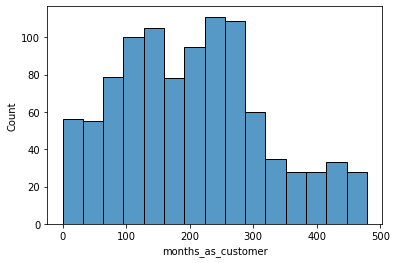

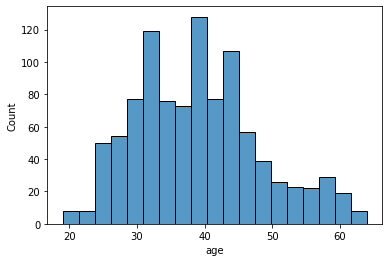

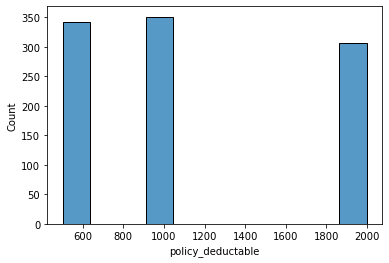

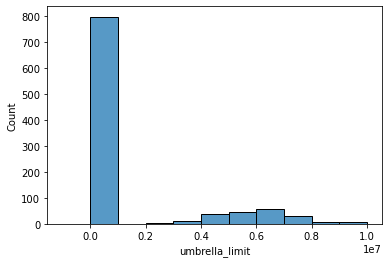

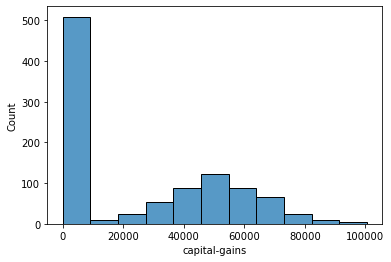

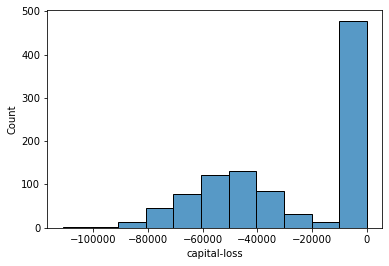

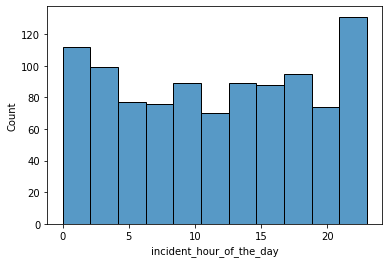

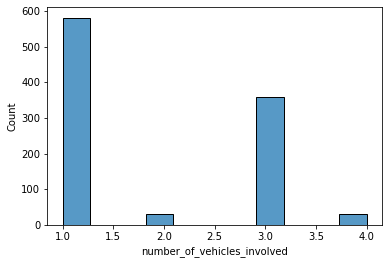

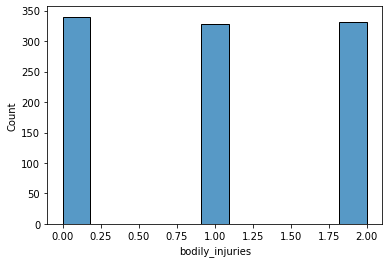

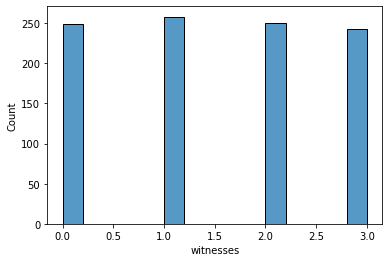

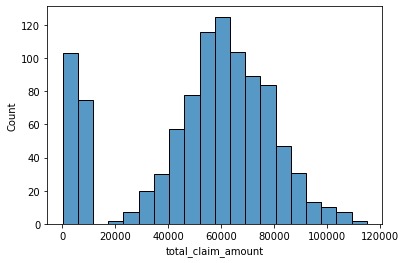

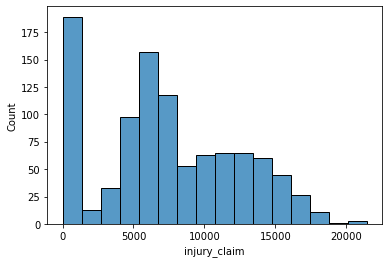

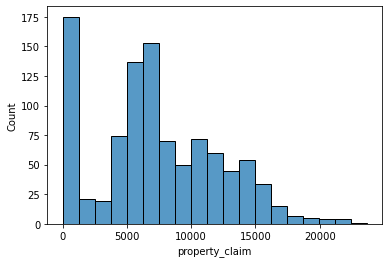

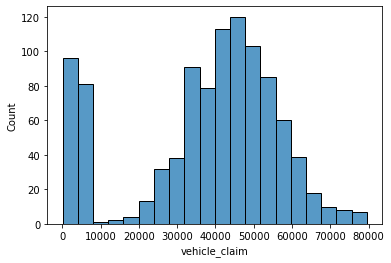

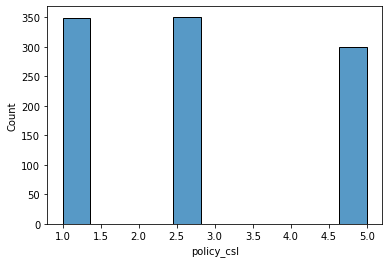

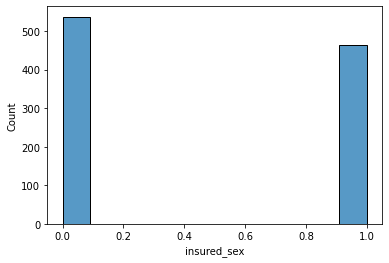

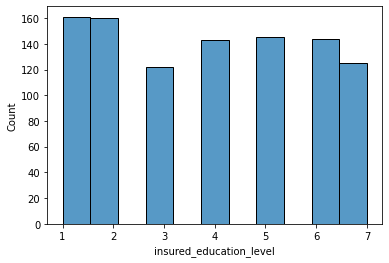

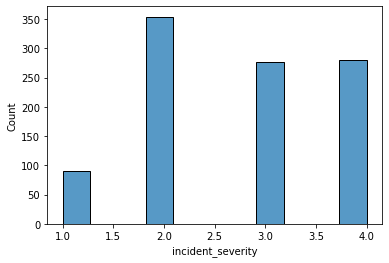

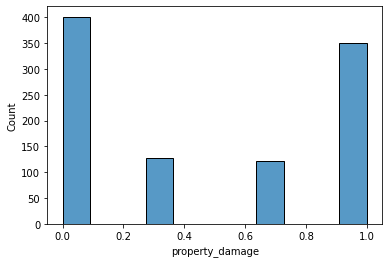

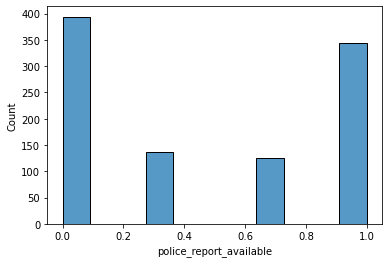

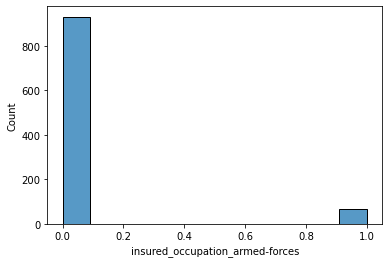

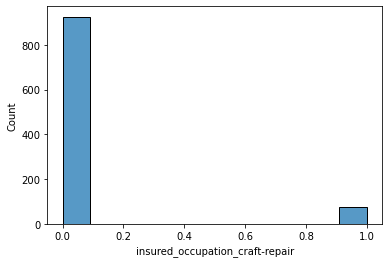

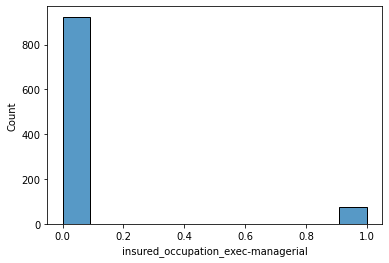

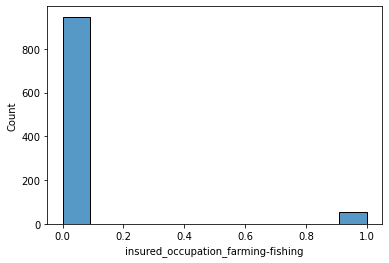

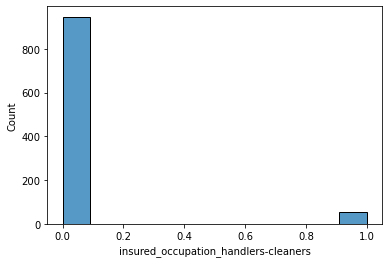

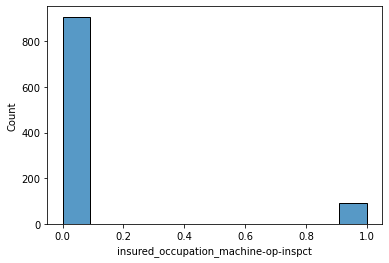

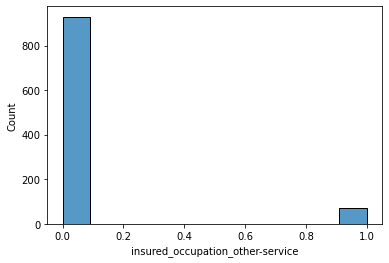

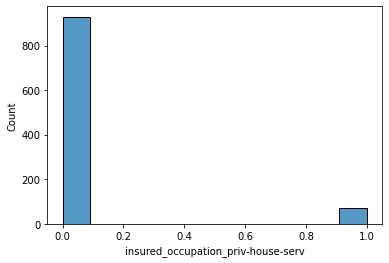

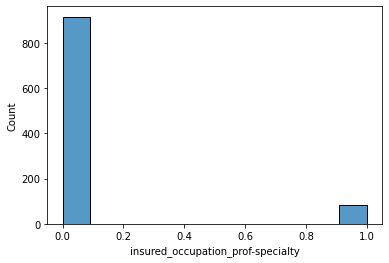

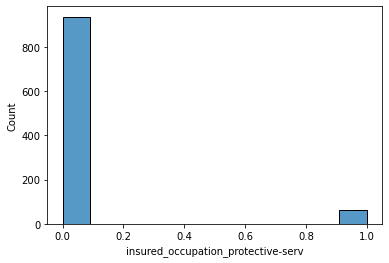

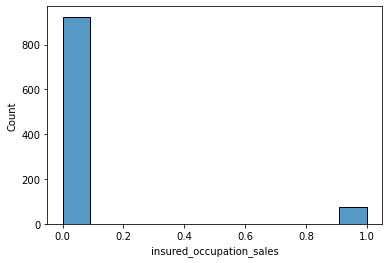

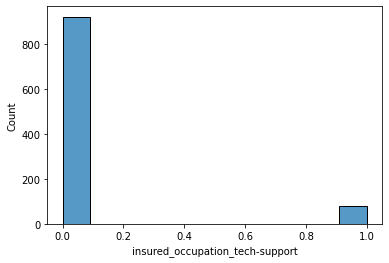

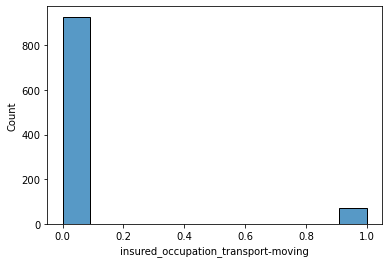

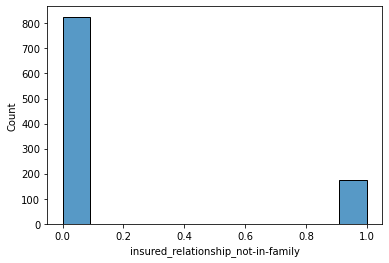

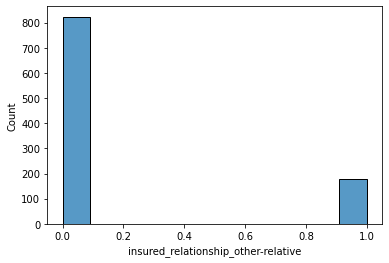

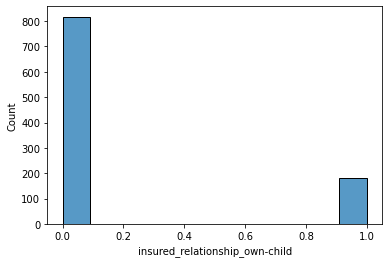

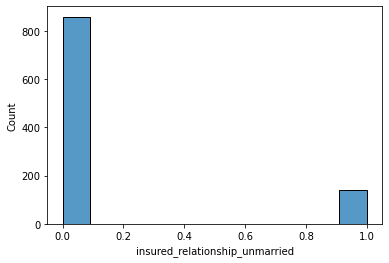

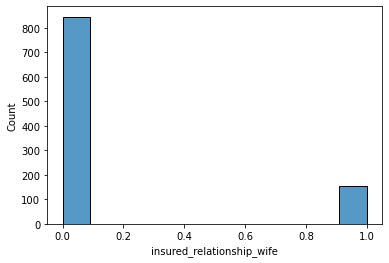

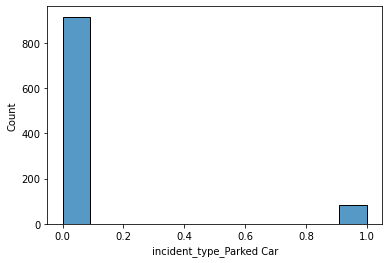

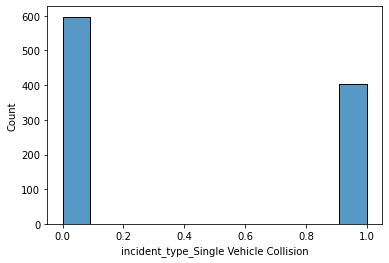

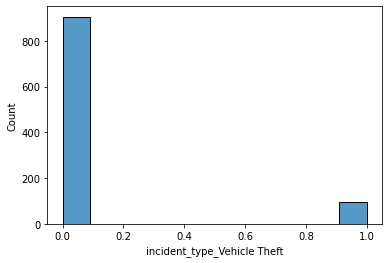

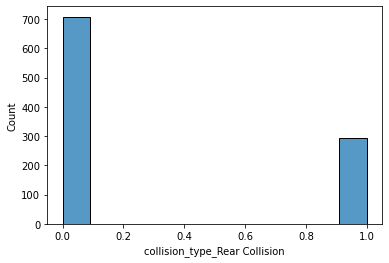

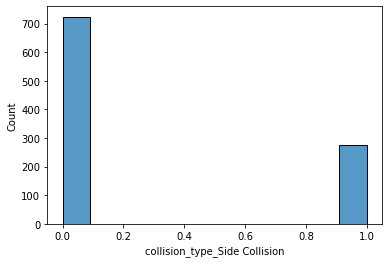

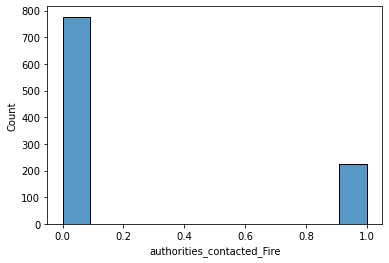

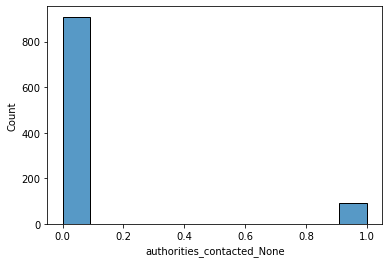

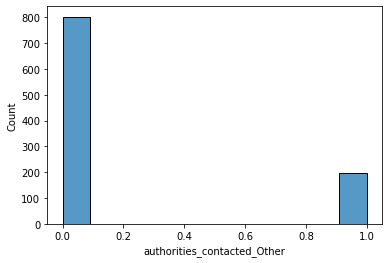

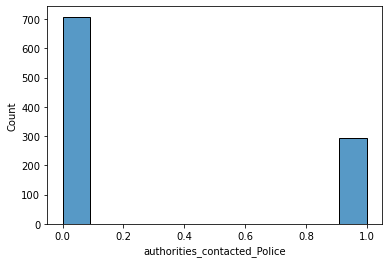

In [74]:
for i, col in enumerate(X_trans.columns):
    plt.figure(i)
    sns.histplot(X_trans[col])

<AxesSubplot:>

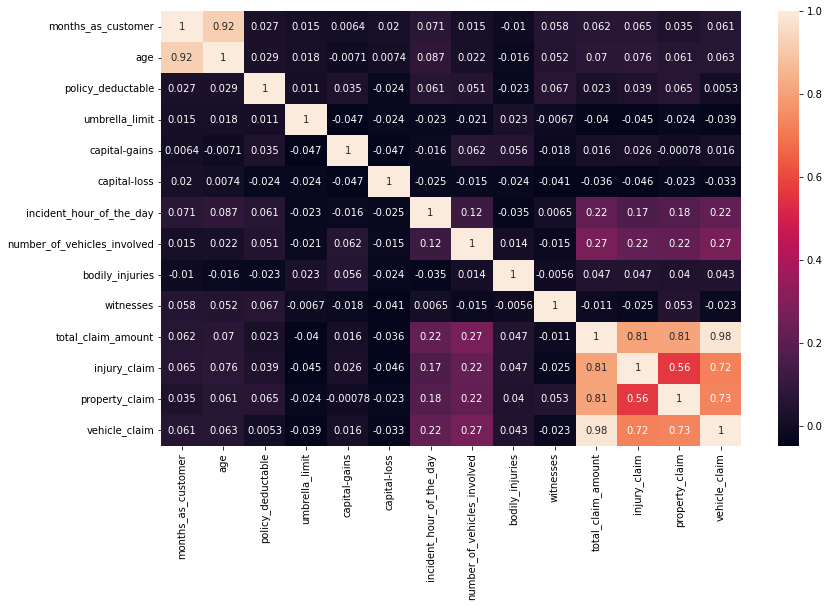

In [75]:
plt.figure(figsize=(13,8))
sns.heatmap(num_df.corr(), annot=True )


#### From the plot above, we can see that there is high correlation between Age and the number of months. we'll drop the age column.
#### Also, there is high correlation between total claim amount, injury claim,vehicle claim, and property claim as total claim is the sum of all others. So, we'll drop the total claim column.

In [76]:
X_trans.columns

Index(['months_as_customer', 'age', 'policy_deductable', 'umbrella_limit',
       'capital-gains', 'capital-loss', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'bodily_injuries', 'witnesses',
       'total_claim_amount', 'injury_claim', 'property_claim', 'vehicle_claim',
       'policy_csl', 'insured_sex', 'insured_education_level',
       'incident_severity', 'property_damage', 'police_report_available',
       'insured_occupation_armed-forces', 'insured_occupation_craft-repair',
       'insured_occupation_exec-managerial',
       'insured_occupation_farming-fishing',
       'insured_occupation_handlers-cleaners',
       'insured_occupation_machine-op-inspct',
       'insured_occupation_other-service',
       'insured_occupation_priv-house-serv',
       'insured_occupation_prof-specialty',
       'insured_occupation_protective-serv', 'insured_occupation_sales',
       'insured_occupation_tech-support',
       'insured_occupation_transport-moving',
       'insured_

In [77]:
X_trans.drop(columns=['age','total_claim_amount'], inplace=True)

### Splitting the data for model training


In [78]:
# splitting the data into training and test set
from sklearn.model_selection import train_test_split

train_x,test_x,train_y,test_y=train_test_split(X_trans, y, random_state=75)

In [79]:
train_x.head()

,months_as_customer,policy_deductable,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,injury_claim,...,insured_relationship_wife,incident_type_Parked Car,incident_type_Single Vehicle Collision,incident_type_Vehicle Theft,collision_type_Rear Collision,collision_type_Side Collision,authorities_contacted_Fire,authorities_contacted_None,authorities_contacted_Other,authorities_contacted_Police
71,222.0,2000.0,0.0,37800.0,-50300.0,7.0,1.0,0.0,2.0,6810.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
587,463.0,1000.0,0.0,51700.0,0.0,14.0,2.0,1.0,2.0,7240.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
330,129.0,1000.0,0.0,0.0,0.0,23.0,1.0,2.0,3.0,9920.0,...,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
546,230.0,2000.0,0.0,48100.0,0.0,13.0,1.0,0.0,2.0,13720.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
178,245.0,500.0,0.0,27000.0,-58900.0,0.0,1.0,0.0,1.0,13100.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [80]:
train_x.shape

(750, 45)

In [81]:
# NUMERIC VALUES For Standard Scalar

In [82]:
num_df=train_x[['months_as_customer', 'policy_deductable', 'umbrella_limit',
       'capital-gains', 'capital-loss', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'bodily_injuries', 'witnesses', 'injury_claim', 'property_claim',
       'vehicle_claim']]

In [83]:
num_df.columns

Index(['months_as_customer', 'policy_deductable', 'umbrella_limit',
       'capital-gains', 'capital-loss', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'bodily_injuries', 'witnesses',
       'injury_claim', 'property_claim', 'vehicle_claim'],
      dtype='object')

In [84]:
print(train_x.shape)
print(num_df.shape)

(750, 45)
(750, 12)


In [85]:
# Scaling the numeric values in the dataset

from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [86]:
scaled_data=scaler.fit_transform(num_df)
scaled_num_df= pd.DataFrame(data=scaled_data, columns=num_df.columns,index=train_x.index)
scaled_num_df.shape

(750, 12)

In [87]:
scaled_num_df.isna().sum()

months_as_customer             0
policy_deductable              0
umbrella_limit                 0
capital-gains                  0
capital-loss                   0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
bodily_injuries                0
witnesses                      0
injury_claim                   0
property_claim                 0
vehicle_claim                  0
dtype: int64

In [88]:
train_x.drop(columns=scaled_num_df.columns, inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4901: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [89]:
train_x.shape

(750, 33)

In [90]:
train_x.head()

,policy_csl,insured_sex,insured_education_level,incident_severity,property_damage,police_report_available,insured_occupation_armed-forces,insured_occupation_craft-repair,insured_occupation_exec-managerial,insured_occupation_farming-fishing,...,insured_relationship_wife,incident_type_Parked Car,incident_type_Single Vehicle Collision,incident_type_Vehicle Theft,collision_type_Rear Collision,collision_type_Side Collision,authorities_contacted_Fire,authorities_contacted_None,authorities_contacted_Other,authorities_contacted_Police
71,1.0,0.0,6.0,4.0,0.000000,0.000000,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
587,2.5,0.0,1.0,3.0,0.666667,0.000000,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
330,5.0,1.0,4.0,3.0,0.666667,0.666667,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
546,1.0,1.0,6.0,4.0,0.333333,0.333333,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
178,5.0,0.0,4.0,4.0,1.000000,0.000000,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [91]:
train_x=pd.concat([scaled_num_df,train_x],axis=1)

In [83]:
# first using the Support vector classifier for model training
from sklearn.svm import SVC
sv_classifier=SVC()

In [84]:
y_pred = sv_classifier.fit(train_x, train_y).predict(test_x)

In [85]:
from sklearn.metrics import accuracy_score

In [86]:
sc=accuracy_score(test_y,y_pred)
sc

0.78

In [87]:
from sklearn.model_selection import GridSearchCV

In [88]:
param_grid = {"kernel": ['rbf','sigmoid'],
             "C":[0.1,0.5,1.0],
             "random_state":[0,100,200,300]}

In [89]:
grid = GridSearchCV(estimator=sv_classifier, param_grid=param_grid, cv=5,  verbose=3)

In [90]:
grid.fit(train_x, train_y)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV 1/5] END .C=0.1, kernel=rbf, random_state=0;, score=0.740 total time=   0.2s
[CV 2/5] END .C=0.1, kernel=rbf, random_state=0;, score=0.740 total time=   0.2s
[CV 3/5] END .C=0.1, kernel=rbf, random_state=0;, score=0.747 total time=   0.2s
[CV 4/5] END .C=0.1, kernel=rbf, random_state=0;, score=0.747 total time=   0.2s
[CV 5/5] END .C=0.1, kernel=rbf, random_state=0;, score=0.747 total time=   0.2s
[CV 1/5] END C=0.1, kernel=rbf, random_state=100;, score=0.740 total time=   0.2s
[CV 2/5] END C=0.1, kernel=rbf, random_state=100;, score=0.740 total time=   0.2s
[CV 3/5] END C=0.1, kernel=rbf, random_state=100;, score=0.747 total time=   0.2s
[CV 4/5] END C=0.1, kernel=rbf, random_state=100;, score=0.747 total time=   0.2s
[CV 5/5] END C=0.1, kernel=rbf, random_state=100;, score=0.747 total time=   0.2s
[CV 1/5] END C=0.1, kernel=rbf, random_state=200;, score=0.740 total time=   0.2s
[CV 2/5] END C=0.1, kernel=rbf, random_st

[CV 4/5] END C=1.0, kernel=rbf, random_state=300;, score=0.747 total time=   0.2s
[CV 5/5] END C=1.0, kernel=rbf, random_state=300;, score=0.747 total time=   0.2s
[CV 1/5] END C=1.0, kernel=sigmoid, random_state=0;, score=0.740 total time=   0.0s
[CV 2/5] END C=1.0, kernel=sigmoid, random_state=0;, score=0.740 total time=   0.0s
[CV 3/5] END C=1.0, kernel=sigmoid, random_state=0;, score=0.747 total time=   0.0s
[CV 4/5] END C=1.0, kernel=sigmoid, random_state=0;, score=0.740 total time=   0.0s
[CV 5/5] END C=1.0, kernel=sigmoid, random_state=0;, score=0.740 total time=   0.0s
[CV 1/5] END C=1.0, kernel=sigmoid, random_state=100;, score=0.740 total time=   0.0s
[CV 2/5] END C=1.0, kernel=sigmoid, random_state=100;, score=0.740 total time=   0.0s
[CV 3/5] END C=1.0, kernel=sigmoid, random_state=100;, score=0.747 total time=   0.0s
[CV 4/5] END C=1.0, kernel=sigmoid, random_state=100;, score=0.740 total time=   0.0s
[CV 5/5] END C=1.0, kernel=sigmoid, random_state=100;, score=0.740 total

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 0.5, 1.0], 'kernel': ['rbf', 'sigmoid'],
                         'random_state': [0, 100, 200, 300]},
             verbose=3)

In [91]:
grid.best_estimator_

SVC(C=0.1, random_state=0)

In [93]:
!pip install xgboost

     ---------------------------------------- 70.9/70.9 MB 5.6 MB/s eta 0:00:00


In [94]:
from xgboost import XGBClassifier

In [95]:
xgb=XGBClassifier()

In [96]:
y_pred = xgb.fit(train_x, train_y).predict(test_x)

In [97]:
ac2=accuracy_score(test_y,y_pred)
ac2

0.792

In [98]:
param_grid = {"n_estimators": [10, 50, 100, 130], "criterion": ['gini', 'entropy'],
                               "max_depth": range(2, 10, 1)}

#Creating an object of the Grid Search class
grid = GridSearchCV(estimator=xgb, param_grid=param_grid, cv=5,  verbose=3,n_jobs=-1)

In [99]:
#finding the best parameters
grid.fit(train_x, train_y)

Fitting 5 folds for each of 64 candidates, totalling 320 fits
[16:52:09] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "criterion" } are not used.



GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=Non

In [100]:
grid.best_estimator_

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, criterion='gini',
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=None, gpu_id=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=8, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, ...)

In [4]:
!pip install catboost

     ---------------------------------------- 74.0/74.0 MB 5.6 MB/s eta 0:00:00


     ---------------------------------------- 47.0/47.0 kB ? eta 0:00:00


In [99]:
# Modelling
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score, precision_score, recall_score, f1_score
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
import warnings

### Create an Evaluate Function to give all metrics after model Training


In [105]:
def evaluate_model(true, predicted):
    acc_score = accuracy_score(true, predicted)
    roc_auc = roc_auc_score(true, predicted)
    prec_score = precision_score(true, predicted)
    rec_score = recall_score(true, predicted)
    f1 = f1_score(true, predicted)
    return acc_score, roc_auc, prec_score, rec_score, f1

In [106]:
models = {
    "Logistic Regression": LogisticRegression(),
    "svc" : SVC(),
    "K Neighbors Classifier": KNeighborsClassifier(),
    "Decision Tree Classifier": DecisionTreeClassifier(),
    "Random Forest Classifier": RandomForestClassifier(),
    "XGBClassifier": XGBClassifier(), 
    "CatBoosting Classifier": CatBoostClassifier(verbose=False),
    "AdaBoost Classifier": AdaBoostClassifier()
}
model_list = []
accuracy_list =[]

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(train_x, train_y) # Train model

    # Make predictions
    train_y_pred = model.predict(train_x)
    test_y_pred = model.predict(test_x)
    
    # Evaluate Train and Test dataset
    train_accuracy_score, train_roc_auc_score, train_precision_score, train_recall_score, train_f1_score = evaluate_model(train_y, train_y_pred)

    test_accuracy_score, test_roc_auc_score, test_precision_score, test_recall_score, test_f1_score = evaluate_model(test_y, test_y_pred)

    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- train_accuracy_score: {:.4f}".format(train_accuracy_score))
    print("- train_roc_auc_score: {:.4f}".format(train_roc_auc_score))
    print("- train_precision_score: {:.4f}".format(train_precision_score))
    print("- train_recall_score: {:.4f}".format(train_recall_score))
    print("- train_f1_score: {:.4f}".format(train_f1_score))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- test_accuracy_score: {:.4f}".format(test_accuracy_score))
    print("- test_roc_auc_score: {:.4f}".format(test_roc_auc_score))
    print("- test_precision_score: {:.4f}".format(test_precision_score))
    print("- test_recall_score: {:.4f}".format(test_recall_score))
    print("- test_f1_score: {:.4f}".format(test_f1_score))
    accuracy_list.append(test_accuracy_score)
    
    print('='*35)
    print('\n')

Logistic Regression
Model performance for Training set
- train_accuracy_score: 0.7467
- train_roc_auc_score: 0.5206
- train_precision_score: 0.5500
- train_recall_score: 0.0573
- train_f1_score: 0.1038
----------------------------------
Model performance for Test set
- test_accuracy_score: 0.3200
- test_roc_auc_score: 0.5576
- test_precision_score: 0.2422
- test_recall_score: 0.9818
- test_f1_score: 0.3885




C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


svc
Model performance for Training set
- train_accuracy_score: 0.7440
- train_roc_auc_score: 0.5000
- train_precision_score: 0.0000
- train_recall_score: 0.0000
- train_f1_score: 0.0000
----------------------------------
Model performance for Test set
- test_accuracy_score: 0.7800
- test_roc_auc_score: 0.5000
- test_precision_score: 0.0000
- test_recall_score: 0.0000
- test_f1_score: 0.0000




C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


K Neighbors Classifier
Model performance for Training set
- train_accuracy_score: 0.7867
- train_roc_auc_score: 0.6380
- train_precision_score: 0.6667
- train_recall_score: 0.3333
- train_f1_score: 0.4444
----------------------------------
Model performance for Test set
- test_accuracy_score: 0.6600
- test_roc_auc_score: 0.5601
- test_precision_score: 0.2917
- test_recall_score: 0.3818
- test_f1_score: 0.3307


Decision Tree Classifier
Model performance for Training set
- train_accuracy_score: 1.0000
- train_roc_auc_score: 1.0000
- train_precision_score: 1.0000
- train_recall_score: 1.0000
- train_f1_score: 1.0000
----------------------------------
Model performance for Test set
- test_accuracy_score: 0.4520
- test_roc_auc_score: 0.5117
- test_precision_score: 0.2267
- test_recall_score: 0.6182
- test_f1_score: 0.3317


Random Forest Classifier
Model performance for Training set
- train_accuracy_score: 1.0000
- train_roc_auc_score: 1.0000
- train_precision_score: 1.0000
- train_recall_